# Lab 2: Linear Regression using polynomials

## Goals
In this lab, you will:
- learn how to use polynomials to fit more complex models using linear regression.

<a name="toc_40291_2"></a>
# Problem Statement
As we saw in the previous lab, [linear regression](https://www.ibm.com/topics/linear-regression) analysis is used to predict the value of a variable (*y*) based on the value of another variable (*x*). The variable you want to predict is called the dependent variable (*y*). The variable you are using to predict the other variable's value is called the independent variable (*x*).

This form of analysis estimates the coefficients of a linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. 



---



In this lab we are going to see how this algorithm works with a simple example, using the Python library "numpy", especifically the ["polyfit"](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) and the ["poly1d"](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) functions. 

First, we are going to import some libraries and functions that we will use:


*   **Numpy**, that allows us to work with arrays and create the models
*   The **"pyplot"** package from Matplotlib, that will allow us to plot some results

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Then we define some functions that will be useful to plot the results of the models we will create

In [3]:
# Plot a figure with the data and the regression function
def plot_data(xTrain, yTrain, model, name, xVal = None, yVal = None, validation = False):
  polyline = np.linspace(1.9, 13, 100)

  fig, ax = plt.subplots(figsize=(10, 7))
  plt.scatter(xTrain, yTrain, s=100, c = 'b')
  if validation:
    plt.scatter(xVal, yVal, s=100, c = 'orange')   
  plt.rcParams.update({'font.size': 14})

  ax.set_xlabel('years(x)')
  ax.set_ylabel('price(y)')
  ax.set_title('price for used cars '+ name)
  
  ax.axis([1.5, 13, 0, 12000])
  ax.grid(True);
  plt.plot(polyline, model(polyline))


## DATA

In this case, we are presented with a simple problem: the price of used cars along the years. Cars are then presumed to be in a linear relationship with how old it is. We have two datasets:


*   Training data, where **xTrain** contains a single feature (car age) for the training dataset, and **yTrain** contains the ground truth labels of these samples, in this case the price of the car. This dataset will be used to fit the models we will train.
*   Validation data, where **xVal** contains the features of the validation dataset, so, the age of each car, and **yVal** contains the ground truth of these samples, in this case the price of the car. This dataset will be used to verify how accurate the fitted models are, using data that has not been used to train the model.

In [4]:
# Training data
xTrain = np.array([2, 2.5, 2.75, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 9.5, 10, 11, 12, 12.5])
# Labels of the training data
yTrain = np.array([11200, 9950, 10750, 9400, 7500, 6300, 5800, 5700, 4200, 4400, 4200, 3800, 3950, 2700, 2100, 2500, 1850, 1800])

# Validation data
xVal = np.array([2.5, 2.75, 3.5, 4, 5, 5.75, 6.5, 7, 8, 8.5, 9, 10.5, 12, 9.5])
# Labels of the validation data
yVal = np.array([10250, 8750, 8500, 5800, 6200, 5000, 4500, 3500, 3250, 3000, 2250, 2500, 2250, 3800])

First, we are going to plot the training data and analize it.

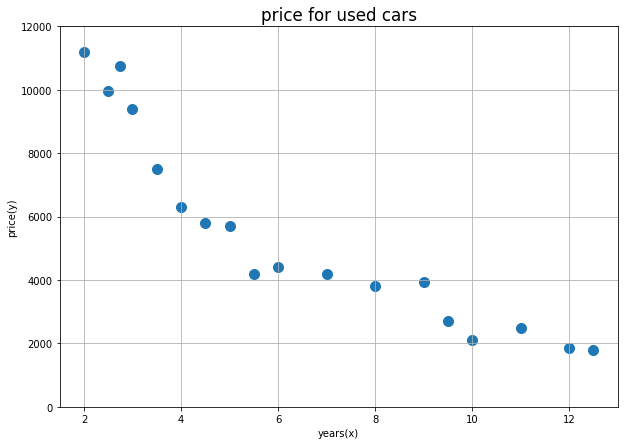

In [5]:
# Plot the training data
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(xTrain, yTrain, s=100)

plt.rcParams.update({'font.size': 14})

ax.set_xlabel('years(x)')
ax.set_ylabel('price(y)')
ax.set_title('price for used cars')

ax.axis([1.5, 13, 0, 12000])
ax.grid(True)

<a name="toc_40291_2.2"></a>
##  Modeling Linear Regressions
To start, we have an example of how to create a basic regressions function with dregree = 1 using the ["polyfit"](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) and the ["poly1d"](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) functions. Next, the mean error percentage is computed for the train data and the fitted function and the training data is plotted.

Mean error train:
24.58


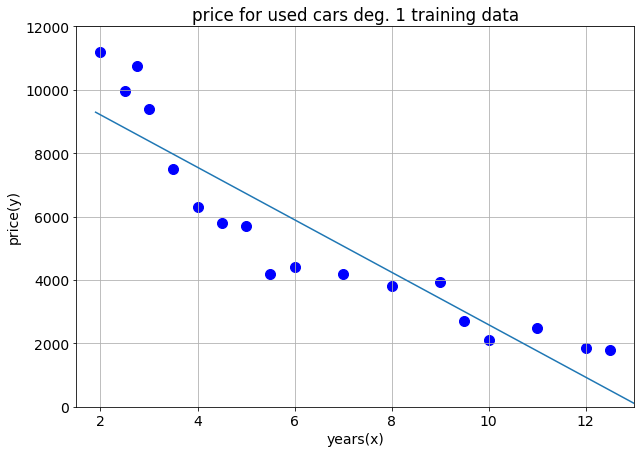

In [6]:
#polynomial fit with degree = 1
modeld1 = np.poly1d(np.polyfit(xTrain, yTrain, 1))
#mean error percentatge is computed for the train data
print("Mean error train:")
per1 = np.sum(np.abs(modeld1(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(round(per1,2))
# plot model and training data
plot_data(xTrain, yTrain, modeld1, "deg. 1 training data")

Sometimes a higher degree function give better results to our problems.

Define a new model with a polynomial function of degrees 2 and 4, and compare the results with the linear ones. **Which one is better?**

$\color{red}{\text{The polynomial of degree 2 is better}}$

Mean error train deg. 2:
14.207545998417812
Mean error train deg. 4:
8.809393580201283


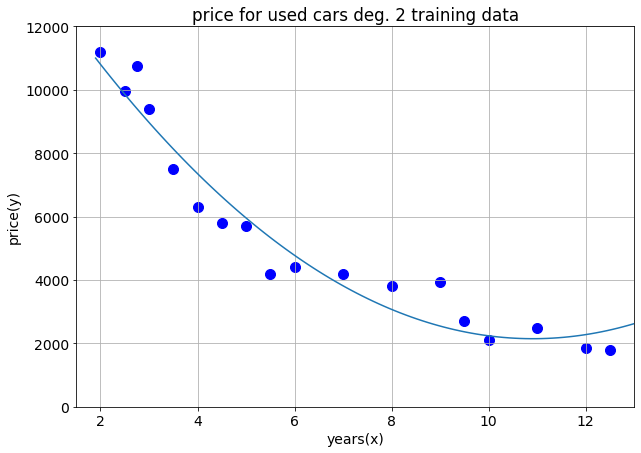

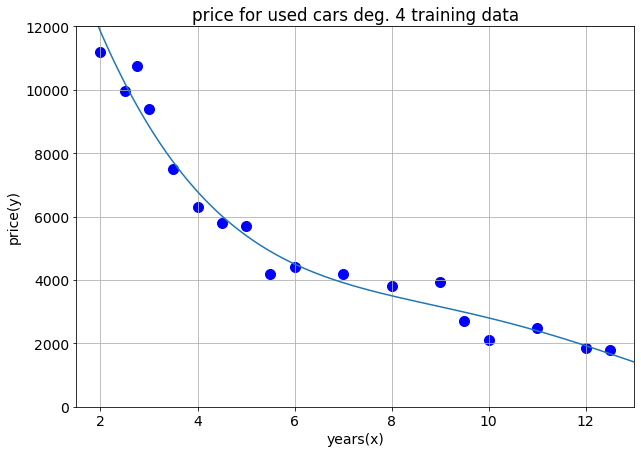

In [7]:
# TO DO: Define a new model with a polynomial function of degrees 2 and 4, and compare the results with the linear ones.

#polynomial fit with degree = 2
modeld2 = np.poly1d(np.polyfit(xTrain, yTrain, 2))
#mean error percentatge is computed for the train data
print("Mean error train deg. 2:")
per2 = np.sum(np.abs(modeld2(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per2)
# plot model and training data
plot_data(xTrain, yTrain, modeld2, "deg. 2 training data")

#polynomial fit with degree = 4
modeld4 = np.poly1d(np.polyfit(xTrain, yTrain, 4))
#mean error percentatge is computed for the train data
print("Mean error train deg. 4:")
per4 = np.sum(np.abs(modeld4(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per4)
# plot model and training data
plot_data(xTrain, yTrain, modeld4, "deg. 4 training data")

As we saw before, we have another dataset called "validation data" that allows us to further check which model is better for us. Compute the mean error percentage for the model with the validation data and compare them with the training data . **Now, which model do you think is better for our data? Is it the same as the one chosen before? Explain why.**

$\color{red}{\text{The polynomial of second degree is better for our data because it minimizes the mean error percentage of our data.} \\ \text{From the mean error percentage just computed, we see that a linear polymial doesn't give us the optimal value (in this case, minimum error) while a}\\\text{  polynomial of degree four will increase the mean error percentage of our validation data. Hence, the second degree polynomial is a better choice in this case}}$

Mean error train model deg 1: 24.58073942307833
Mean error test model deg 1: 25.17368105669305
Mean error train model deg 2: 14.207545998417812
Mean error test model deg 2: 9.982021272220376
Mean error train model deg 4: 8.809393580201283
Mean error test model deg 4: 12.300180371151185


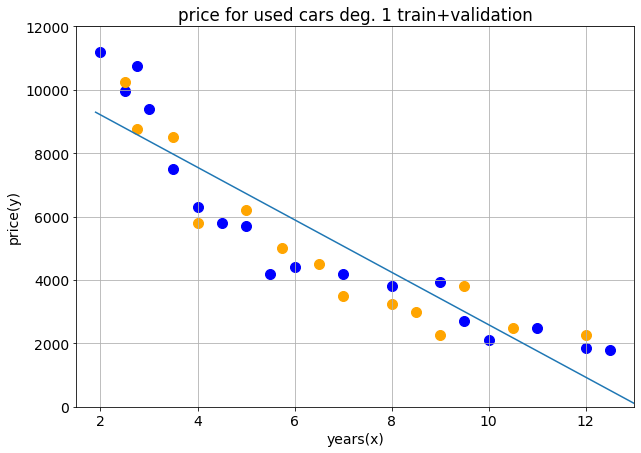

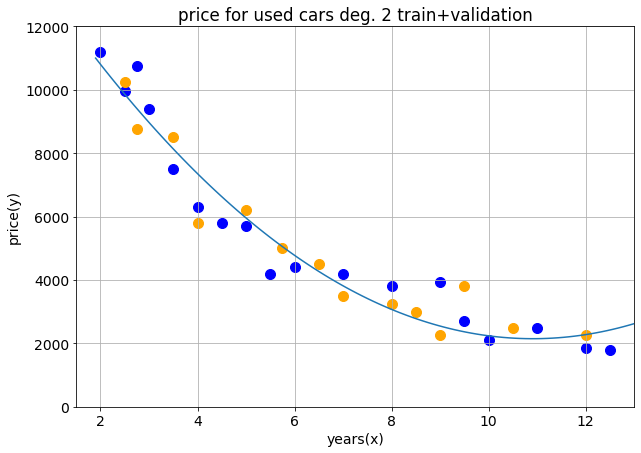

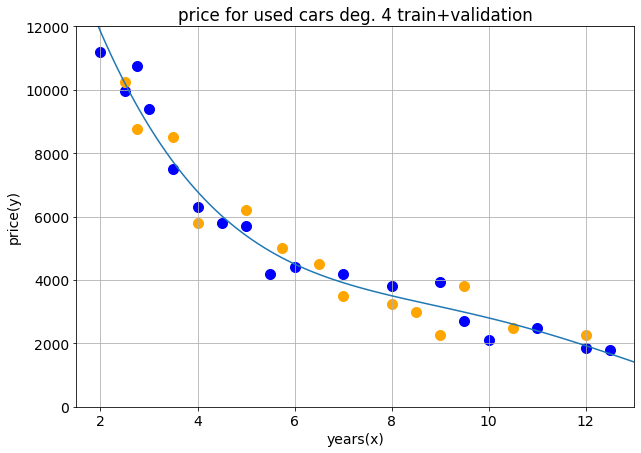

In [8]:
#mean error percentatge for model deg. 1 is computed for the train and validation data
print(f"Mean error train model deg 1: {per1}")
per_val1 = np.sum(np.abs(modeld1(xVal)-yVal)/yVal)/len(yVal)*100
print(f"Mean error test model deg 1: {per_val1}")
# plot model and training data
plot_data(xTrain, yTrain, modeld1, "deg. 1 train+validation", xVal, yVal, True)

#mean error percentatge for model deg. 1 is computed for the train and validation data
print(f"Mean error train model deg 2: {per2}")
per_val2 = np.sum(np.abs(modeld2(xVal)-yVal)/yVal)/len(yVal)*100
print(f"Mean error test model deg 2: {per_val2}")
# plot model and training data
plot_data(xTrain, yTrain, modeld2, "deg. 2 train+validation", xVal, yVal, True)

#mean error percentatge for model deg. 1 is computed for the train and validation data
print(f"Mean error train model deg 4: {per4}")
per_val4 = np.sum(np.abs(modeld4(xVal)-yVal)/yVal)/len(yVal)*100
print(f"Mean error test model deg 4: {per_val4}")

# plot model and training data
plot_data(xTrain, yTrain, modeld4, "deg. 4 train+validation", xVal, yVal, True)

In reality, when running Gradient Descent, your loss is computed as the Mean Squared Error. 
1. Import the function "mean_squared_error" from the library "sklearn.metrics"
2. Create a FOR loop that trains models from degree 1 to degree 14
3. Plot the model at every iteration, and compute de MSE for train and for validation. Store them in two vectors "TrainMSE" and "ValMSE".


degree.1 TrainMSE  = 1497428.8455250978
degree.1 ValMSE    = 1139035.1781437532

degree.2 TrainMSE  = 518522.3091726209
degree.2 ValMSE    = 406056.4255161988

degree.3 TrainMSE  = 266259.01944789133
degree.3 ValMSE    = 350732.4718125762

degree.4 TrainMSE  = 259139.95057814516
degree.4 ValMSE    = 351929.99004614

degree.5 TrainMSE  = 204363.55901136235
degree.5 ValMSE    = 490565.58405715553

degree.6 TrainMSE  = 155890.8459256531
degree.6 ValMSE    = 559819.6906717608

degree.7 TrainMSE  = 155740.16677214613
degree.7 ValMSE    = 555035.832851852

degree.8 TrainMSE  = 155028.38488485932
degree.8 ValMSE    = 551504.1269448438

degree.9 TrainMSE  = 144365.93399614035
degree.9 ValMSE    = 623854.3729324247

degree.10 TrainMSE  = 103349.15741519368
degree.10 ValMSE    = 686784.5465783951

degree.11 TrainMSE  = 99196.8336981037
degree.11 ValMSE    = 683898.1531393178

degree.12 TrainMSE  = 50188.22394287828
degree.12 ValMSE    = 794175.3462974227

degree.13 TrainMSE  = 35298.720312138226

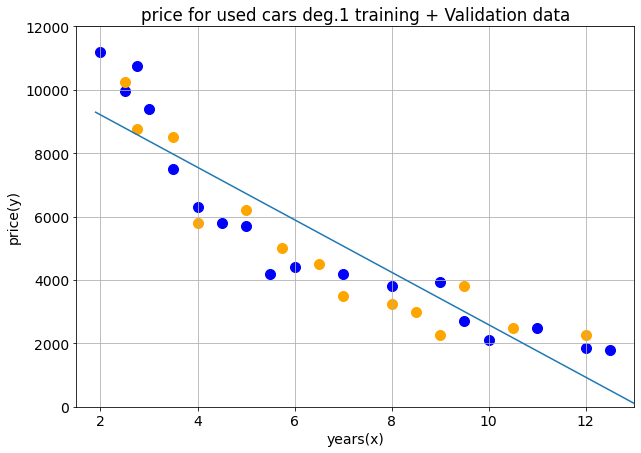

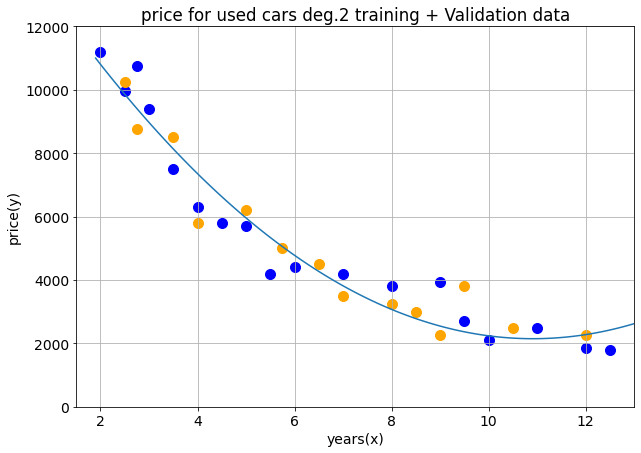

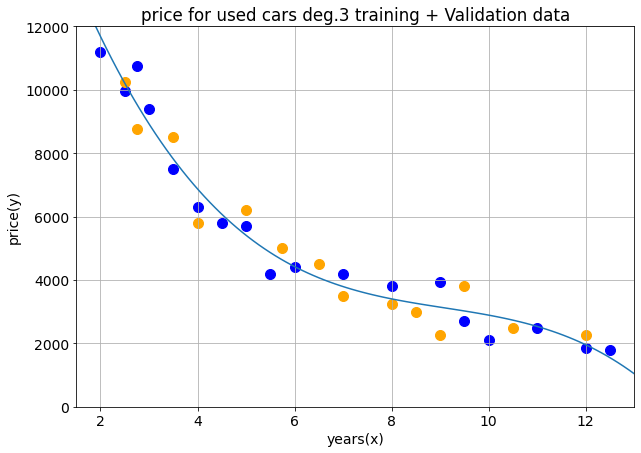

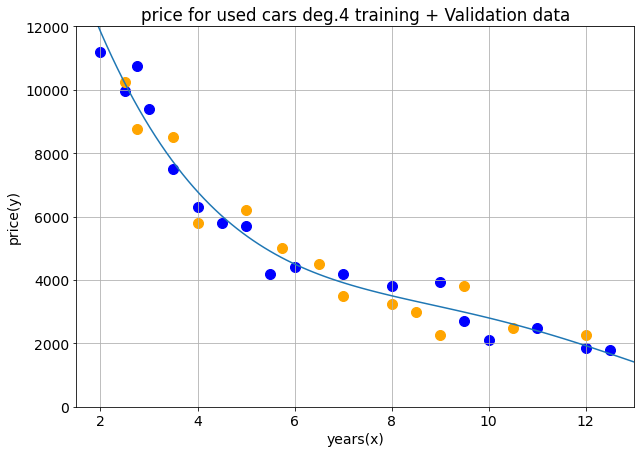

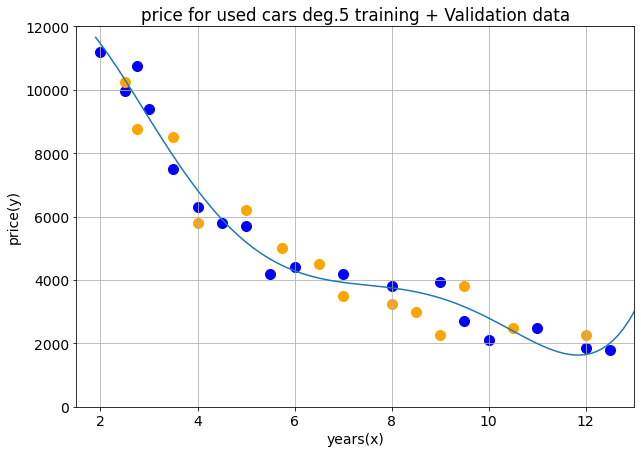

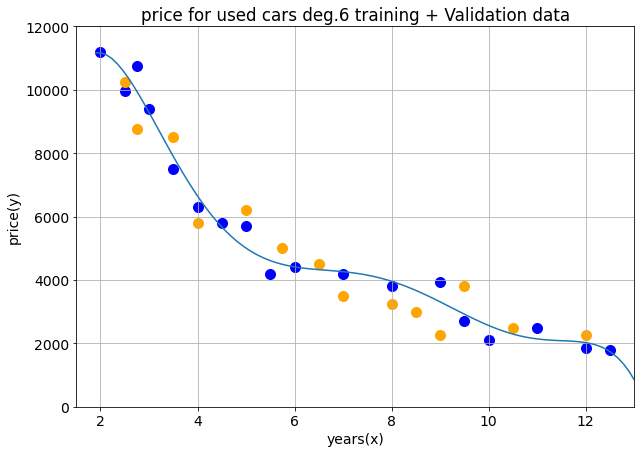

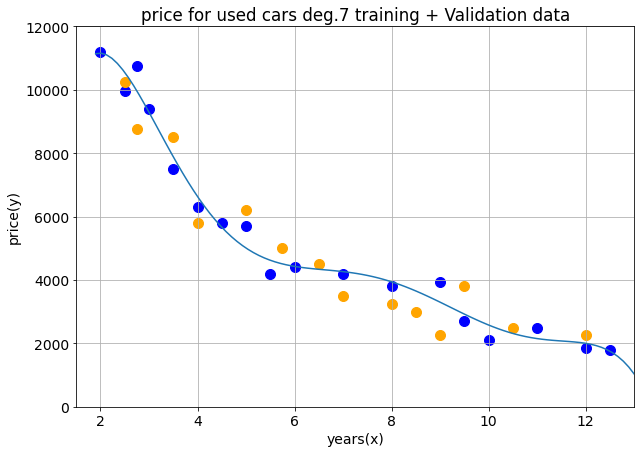

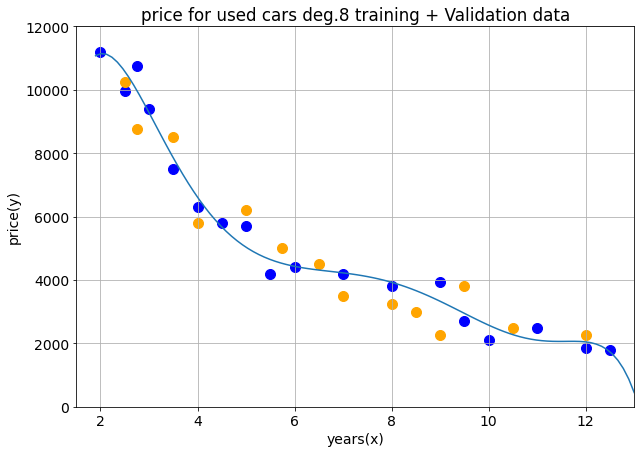

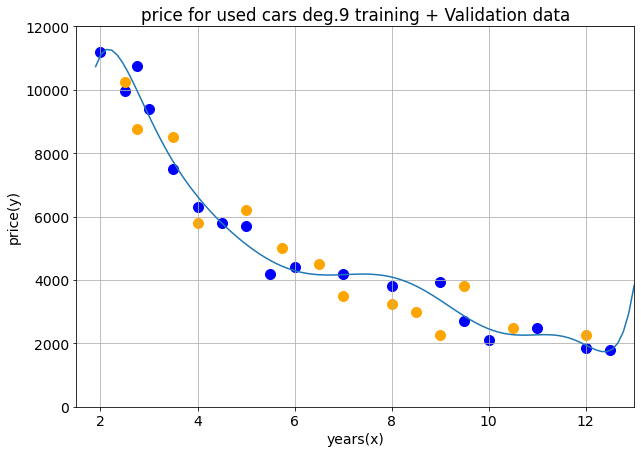

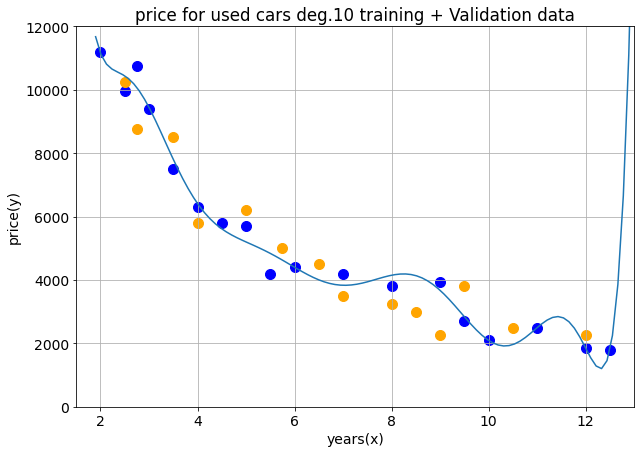

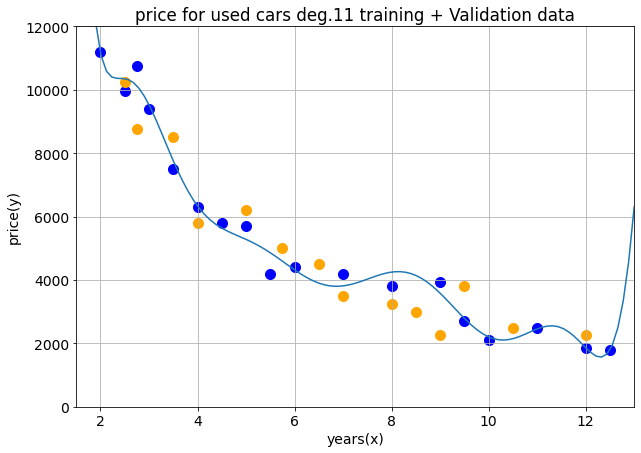

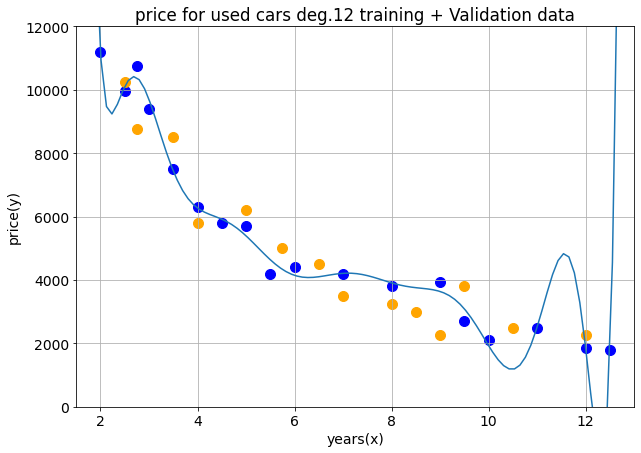

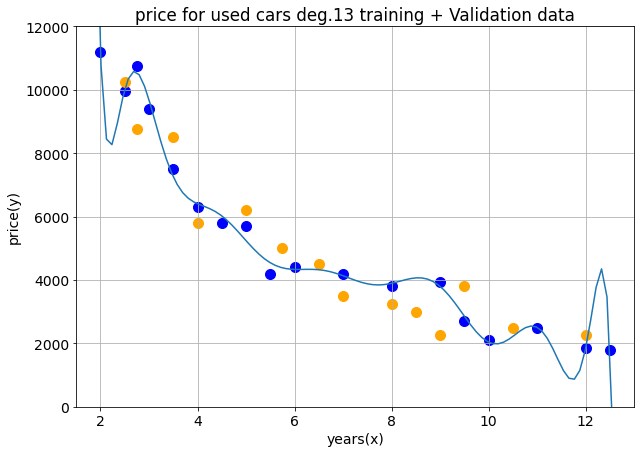

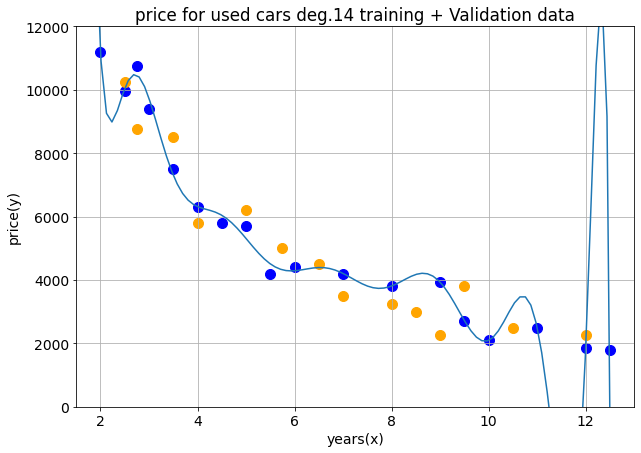

In [9]:
# Import library
from sklearn.metrics import mean_squared_error

TrainMSE = []
ValMSE = []
for i in range(1, 15):
  # fit and train the model for each degree of polynomial i
  modeldi = np.poly1d(np.polyfit(xTrain, yTrain, i))

  # compute the target value (price of the car) for each degree of polynomial using the validation data xVal
  yPred = modeldi(xVal)

  # plot the model, training and validation data
  plot_data(xTrain, yTrain, modeldi, "deg."+ str(i) + " training + Validation data", xVal, yVal, True)

  # compute the train and validation mean squared error per degree
  error_train = mean_squared_error(yTrain, modeldi(xTrain))
  error_val = mean_squared_error(yVal, yPred)

  # stores the mean_squared error for both training and validation in a list
  TrainMSE.append(error_train)
  ValMSE.append(error_val)

  # print the mean_squared error for both training and validation
  print("degree." + str(i) + " TrainMSE " + f" = {TrainMSE[i-1]}")
  print("degree." + str(i) + " ValMSE " + f"   = {ValMSE[i-1]}\n" )



Plot "TrainMSE" and "ValMSE" for every degree of polynomial. **What would be the best model? Explain why**



$\color{red}{\text{The polynomial of degree 3 is the best model because it gives the minimal cost for the validation data.}\\ \text{Hence, our model performs best on unseen data using a polynomial of degree three}}$

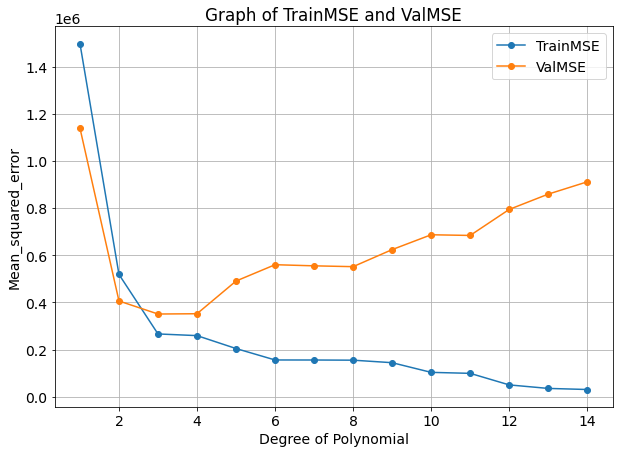

In [35]:
# Plot TrainMSE and ValMSE to compare the fitted models computed above
degree = [i for i in range(1,15)]
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(degree, TrainMSE, label= "TrainMSE", marker = 'o')
plt.plot(degree, ValMSE, label = "ValMSE", marker = 'o')

plt.rcParams.update({'font.size': 14})

ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('Mean_squared_error')
ax.set_title('Graph of TrainMSE and ValMSE vs Degree of Polynomial')
plt.legend(loc="upper right")
ax.grid(True)

Submit this notebook by the lab deadline, with the cells executed and including your **answers** in the text fields in $\color{red}{\text{red}}$ color.